In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [5]:
selected_cell = 'Non-inflammatory_Macrophage'

In [6]:
estimation = pd.read_csv('Immune.csv',index_col=0)
estimation.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,
TCGA-FV-A495-01,0.502944,0.039921,0.072609,0.118753,0.043602,0.114556,0.024016,0.083598,0,0.850308,0.566432
TCGA-G3-A3CH-11,0.702253,0.034831,0.056965,0.025582,0.028985,0.072150,0.079234,0.000000,0,0.905146,0.452388
TCGA-CC-A3MB-01,0.422038,0.037710,0.104666,0.088301,0.116197,0.087601,0.016644,0.126841,0,0.757387,0.683086
TCGA-BC-A3KF-01,0.533256,0.081065,0.039572,0.060491,0.118433,0.086377,0.022655,0.058151,0,0.798699,0.616649
TCGA-DD-A4NV-01,0.607373,0.012717,0.150426,0.025389,0.100700,0.000000,0.029398,0.073997,0,0.730497,0.691188


In [7]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [8]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [9]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [10]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.502944,0.039921,0.072609,0.118753,0.043602,0.114556,0.024016,0.083598,0,0.850308,0.566432,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.422038,0.037710,0.104666,0.088301,0.116197,0.087601,0.016644,0.126841,0,0.757387,0.683086,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.533256,0.081065,0.039572,0.060491,0.118433,0.086377,0.022655,0.058151,0,0.798699,0.616649,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.607373,0.012717,0.150426,0.025389,0.100700,0.000000,0.029398,0.073997,0,0.730497,0.691188,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.378858,0.071268,0.113728,0.166749,0.075191,0.062765,0.050543,0.080897,0,0.877413,0.551734,409.0,0.0,False,13.633333


In [11]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-CC-A9FV-01,0.000000,0.211497,0.034919,0.326098,0.090877,0.192837,0.078002,0.065769,0,0.647563,0.778271,0.0,0.0,False,0.000000
TCGA-DD-AACZ-01,0.186483,0.186360,0.129372,0.156327,0.081701,0.041683,0.055607,0.162468,0,0.863358,0.534744,88.0,1.0,True,2.933333
TCGA-5R-AA1C-01,0.438337,0.177065,0.113963,0.035384,0.105852,0.033686,0.031467,0.064248,0,0.729932,0.689004,520.0,0.0,False,17.333333
TCGA-FV-A4ZQ-01,0.233071,0.173370,0.026338,0.052637,0.060004,0.129560,0.155096,0.169924,0,0.708550,0.712737,12.0,0.0,False,0.400000
TCGA-DD-AACX-01,0.360816,0.169472,0.117886,0.081305,0.055528,0.067798,0.089758,0.057436,0,0.691988,0.724778,42.0,1.0,True,1.400000


In [12]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [13]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

2

In [14]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.17706486918339998

In [15]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

2e-05

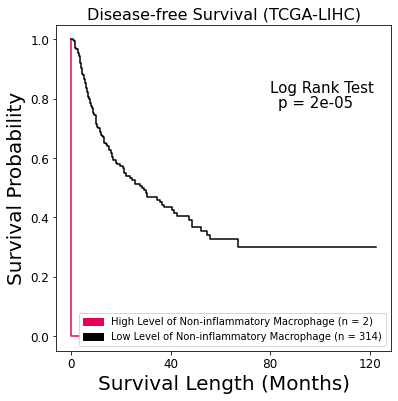

In [17]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Non-inflammatory Macrophage (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Non-inflammatory Macrophage (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [18]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [19]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.502944,0.039921,0.072609,0.118753,0.043602,0.114556,0.024016,0.083598,0,0.850308,0.566432,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.422038,0.037710,0.104666,0.088301,0.116197,0.087601,0.016644,0.126841,0,0.757387,0.683086,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.533256,0.081065,0.039572,0.060491,0.118433,0.086377,0.022655,0.058151,0,0.798699,0.616649,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.607373,0.012717,0.150426,0.025389,0.100700,0.000000,0.029398,0.073997,0,0.730497,0.691188,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.023753,0.041536,0.130552,0.341192,0.059061,0.185780,0.086472,0.131655,0,0.744643,0.717796,101.0,1,True,3.366667


In [20]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-CC-A9FV-01,0.000000,0.211497,0.034919,0.326098,0.090877,0.192837,0.078002,0.065769,0,0.647563,0.778271,0.0,0,False,0.000000
TCGA-DD-AACZ-01,0.186483,0.186360,0.129372,0.156327,0.081701,0.041683,0.055607,0.162468,0,0.863358,0.534744,171.0,1,True,5.700000
TCGA-5R-AA1C-01,0.438337,0.177065,0.113963,0.035384,0.105852,0.033686,0.031467,0.064248,0,0.729932,0.689004,520.0,0,False,17.333333
TCGA-DD-A1EL-01,0.236345,0.175377,0.158598,0.075543,0.096858,0.078801,0.003014,0.175463,0,0.813384,0.611113,415.0,1,True,13.833333
TCGA-FV-A4ZQ-01,0.233071,0.173370,0.026338,0.052637,0.060004,0.129560,0.155096,0.169924,0,0.708550,0.712737,12.0,0,False,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BC-A10T-01,0.591293,0.000000,0.160081,0.024310,0.067297,0.057149,0.074775,0.025095,0,0.768901,0.652324,837.0,1,True,27.900000
TCGA-G3-A6UC-01,0.675356,0.000000,0.078175,0.008946,0.154596,0.030699,0.052227,0.000000,0,0.800201,0.611782,671.0,0,False,22.366667
TCGA-BC-A110-01,0.646724,0.000000,0.096115,0.131623,0.021072,0.077548,0.026918,0.000000,0,0.894205,0.479748,2116.0,1,True,70.533333
TCGA-DD-AADI-01,0.276678,0.000000,0.220458,0.147927,0.082975,0.052561,0.088439,0.130962,0,0.470633,0.883814,1085.0,0,False,36.166667


In [21]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [22]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

2

In [23]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.17706486918339998

In [24]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.00349

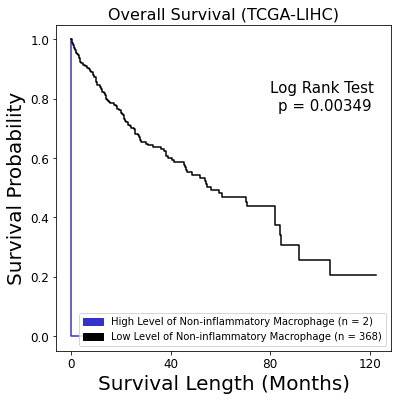

In [25]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Non-inflammatory Macrophage (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Non-inflammatory Macrophage (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [26]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

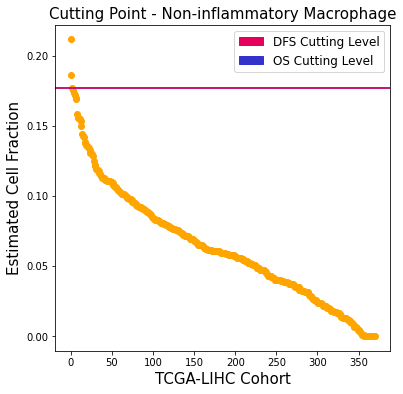

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - Non-inflammatory Macrophage',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')